In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("clean_data/gdp_per_capita.csv")

data.head(10)

,Unnamed: 0,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
1,2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
2,4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN
3,5,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4578.633208,3952.803584,4124.055390,4531.032207,5287.660817,5396.214227,5343.037704,6377.203096,6802.804519,NaN
4,6,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45680.534990,38885.530324,39931.216982,40632.231554,42904.828456,41328.600499,37207.222000,42072.341103,41992.793358,NaN
5,8,United Arab Emirates,ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46865.964598,41525.138904,41054.539570,43063.967479,46722.268719,45376.170839,37629.174168,44315.554184,53757.863251,NaN
6,9,Argentina,ARG,NaN,NaN,1163.186836,855.275656,1179.504098,1285.260799,1277.968419,...,12334.798245,13789.060425,12790.264064,14613.035715,11795.162885,9963.674231,8496.428157,10636.115530,13686.008674,NaN
7,10,Armenia,ARM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4017.229913,3666.141825,3679.952349,4041.995072,4391.923274,4828.504889,4505.867746,4966.513471,7014.206592,NaN
8,12,Antigua and Barbuda,ATG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14004.811212,14861.882707,15862.651663,16110.312400,17514.355864,18187.779712,15284.772384,16740.348196,18745.173509,NaN
9,13,Australia,AUS,1810.597443,1877.600224,1854.641891,1967.108991,2131.380300,2281.011956,2343.819790,...,62515.314832,56708.961197,49876.712376,53934.154374,57206.990670,54941.065720,51722.069000,60444.502355,64491.429886,NaN


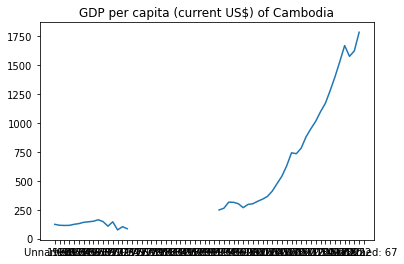

In [42]:
# example gdp graph
exmpl = data.iloc[94]
exmpl_country_name = exmpl.loc["Country Name"]

plt.plot(exmpl.drop(["Country Name", "Country Code"]))
plt.title(f"GDP per capita (current US$) of {exmpl_country_name}")
plt.show()

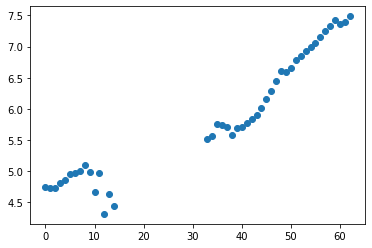

In [49]:
values = list(exmpl.drop(["Unnamed: 0", "Country Name", "Country Code"]))
X, y = [], []

for indx, val in enumerate(values):
    if pd.isna(val): continue
    y.append(np.log(val))
    X.append(indx)

plt.scatter(X, y)
plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

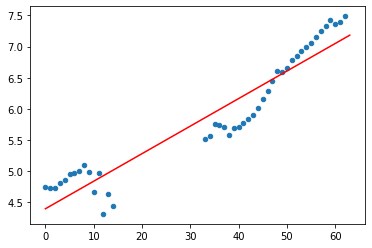

In [51]:
to_predict = np.arange(0.0, 64.0, 1.0)[:, np.newaxis]

prediction = regressor.predict(to_predict)

plt.scatter(X, y, s=20)
plt.plot(to_predict, prediction, color="red")
plt.show()

In [53]:
y_pred = regressor.predict(X)

for i, v in enumerate(y):
    # pass
    print(v, y_pred[i])

[4.74469693] [4.39672036]
[4.7316767] [4.44096256]
[4.7363055] [4.48520477]
[4.81381737] [4.52944697]
[4.86440598] [4.57368917]
[4.94703317] [4.61793138]
[4.97771572] [4.66217358]
[5.00948354] [4.70641578]
[5.09146092] [4.75065799]
[4.98732787] [4.79490019]
[4.67364902] [4.83914239]
[4.97564603] [4.8833846]
[4.31369306] [4.9276268]
[4.63062031] [4.971869]
[4.44401887] [5.01611121]
[5.51079861] [5.85671307]
[5.57003352] [5.90095527]
[5.75302444] [5.94519748]
[5.74806941] [5.98943968]
[5.70783978] [6.03368188]
[5.5887823] [6.07792409]
[5.68897771] [6.12216629]
[5.70882507] [6.16640849]
[5.77734226] [6.2106507]
[5.83199029] [6.2548929]
[5.89790991] [6.2991351]
[6.01636722] [6.34337731]
[6.16346089] [6.38761951]
[6.29110119] [6.43186171]
[6.44559454] [6.47610392]
[6.60988545] [6.52034612]
[6.59961893] [6.56458832]
[6.66274404] [6.60883053]
[6.78027446] [6.65307273]
[6.8569698] [6.69731493]
[6.92286148] [6.74155714]
[7.0013135] [6.78579934]
[7.06539371] [6.83004154]
[7.15547902] [6.87428375

In [52]:
# The coefficients
print("Coefficients: ", regressor.coef_)
# The mean squared error
print("Mean squared error: ", mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: ", r2_score(y, y_pred))

Coefficients:  [[0.0442422]]
Mean squared error:  495271.90419955907
Coefficient of determination:  -536249.9316469517


c:\Users\malik\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


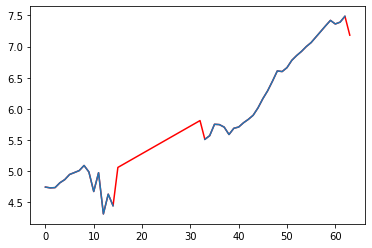

In [54]:
# merge original & interpolated values
merged_values = []

for indx, val in enumerate(values):
    if pd.isna(val):
        merged_values.append(prediction[indx])
    else:
        merged_values.append(np.log(val))

plt.plot(merged_values, color="red")
plt.plot(np.log(values))
plt.show()

In [27]:
merged_values_exp = np.exp(merged_values)
plt.plot(np.expm1(merged_values_exp), color="red")
plt.plot(values)
plt.show()

C:\Users\malik\AppData\Local\Temp/ipykernel_21112/4011705993.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  merged_values_exp = np.exp(merged_values)


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable exp method

In [51]:
pd.Series(merged_values)

0     [3254.4272978084605]
1     [3254.4272978084605]
2     [3254.4272978084605]
3     [3254.4272978084605]
4     [3254.4272978084605]
              ...         
59            46793.686762
60            46772.825351
61            51203.554473
62            48432.455873
63    [48802.945232372535]
Length: 64, dtype: object

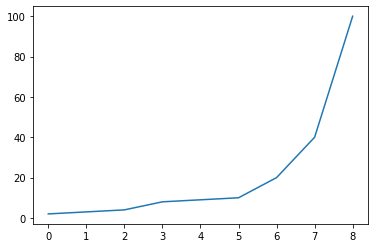

[0.69314718 1.09861229 1.38629436 2.07944154 2.19722458 2.30258509
 2.99573227 3.68887945 4.60517019]


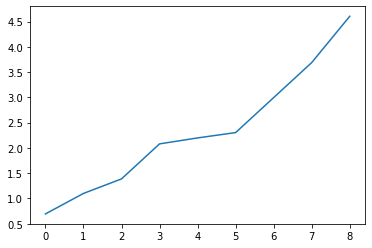

[  2.   3.   4.   8.   9.  10.  20.  40. 100.]


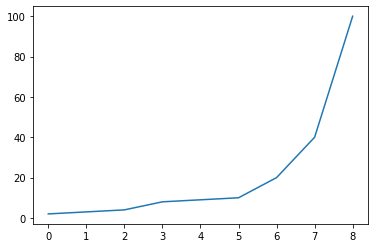

In [57]:
a = np.array([2, 3, 4, 8, 9, 10, 20, 40, 100])

plt.plot(a)
plt.show()

a = np.log(a)
print(a)

plt.plot(a)
plt.show()

a = np.exp(a)
print(a)

plt.plot(a)
plt.show()

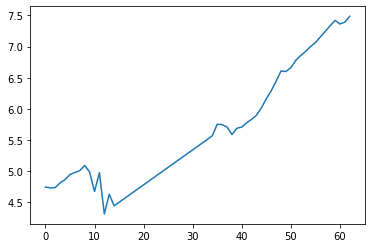

In [59]:
import statsmodels.api as sm

plt.plot(X, y)
plt.show()

In [63]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     353.4
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           2.32e-22
Time:                        13:54:56   Log-Likelihood:                -12.085
No. Observations:                  45   AIC:                             28.17
Df Residuals:                      43   BIC:                             31.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3967      0.093     47.051      0.000       4.208       4.585
x1             0.0442      0.002     18.800      0.000       0.039       0.049
==============================================================================
Omnibus:                       20.410   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.688
Skew:                          -0.402   Prob(JB):                       0.0959
Kurtosis:                       1.638   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
est2.conf_int(alpha=0.05, cols=None)

array([[4.20826916, 4.58517156],
       [0.03949619, 0.04898822]])

In [65]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate some example data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add a constant term to the input matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate confidence intervals
confidence_intervals = model.conf_int()

print(confidence_intervals)

[[-0.61758519  2.94781583]
 [42.47721894 46.39712104]]


ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

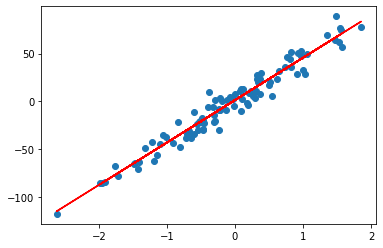

In [70]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate some example data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Add a constant term to the input matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Calculate confidence intervals
confidence_intervals = model.conf_int()

# Plot the data points
plt.scatter(X[:, 1], y, label='Data')

# Plot the regression line
plt.plot(X[:, 1], model.predict(X), color='red', label='Regression Line')

# Plot the confidence intervals
plt.plot(X[:, 1], confidence_intervals[:, 0], color='green', linestyle='dashed', label='Lower CI')
plt.plot(X[:, 1], confidence_intervals[:, 1], color='blue', linestyle='dashed', label='Upper CI')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Confidence Intervals')
plt.show()
